
<ul>
    <li><b>Introduction</b></li>
    <li><b>Data Collection</b></li>
    <li><b>Exploratory Data Analysis</b></li>
    <li><b>Feature Engineering</b></li>
    <li><b>Feature Selection</b></li>
    <li><b>Model Building</b></li>
    <li><b>Model Evaluation</b></li>
</ul>

**<center><big>Data Used<big><center>**<hr>
The primary source of data for this project was from Kaggle repository. The dataset is comprised of 1338 records with 7 attributes.
    
**Dataset Description**
- age-> age of the person
- sex -> gender of the person
- bmi -> Body Mass Index  of the person
- children -> Number of children person has
- smoker -> Whether the person smoke or not
- region -> The region where the person lives
- expenses -> Charge of insurance premium

In [1]:
# import all required libaries here
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=UserWarning)

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from tkinter import*

%matplotlib inline

In [2]:
# import sklearn for data preprocessing and model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [3]:
# Load dataset here
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


- Insights from below table
- Policyholder of 39 old always paid 13270.422414

In [4]:
# Let us see statistical information about the Numerical features
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
# Let us see more statiscal information of the categorical features
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**This shows dataset information like:**
- Dataset Features/variable's data types
- 7 columns and 1338 columns
- Memory usage which is 73.3+ KB

In [6]:
#Let's more information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df = df.drop_duplicates()

In [8]:
# Compute total and percentage of missing data
# None of the columns contain any missing values, which saves us a fair bit of work!
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df.isnull().sum() / df.isnull().count()) * 100 ).sort_values(ascending=False)
    missing_values = pd.concat([missing_number,missing_percent], axis=1, keys = ['Missing_Number','Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
expenses,0,0.0


**<center><h2>Exploratory Data Analysis</h2><center>**<hr>
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
    
This include the following steps:
- Univariate Analysis
- Bivariate Analysis

Let's define fuctions for all our plots, this will help us avoid codes repetition.

Quickly summary of all plots

- **Bar Plot**  -> Bar graph (bar chart) is a graph that represents the categorical data using rectangular bars
- **Histogram**  -> Histogram is used to summarize discrete or continuous data
- **Scatter Plot**  -> the graphs that present the relationship between two numerical variables in a data-set.
- **Pie Chart** -> A pie chart is a circular graph that records data according to numbers, percentages, and degrees.



In [9]:
def BarPlot(df, x, x_label=None, y_label=None, hue=None):
    plt.figure(figsize=(10,6))
    sns.set_style('whitegrid')
    # This function is now specifically for countplots
    ax = sns.countplot(x = x, data = df, hue = hue, palette='viridis')
    BarGraphAnnotation(ax)

    plt.xlabel(x_label,fontdict={'family':'Arial','weight':'bold','size':15})
    plt.ylabel(y_label,fontdict={'family':'Arial','weight':'bold','size':15})
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def BarPlotFromValues(x, y, x_label=None, y_label=None, hue=None):
    plt.figure(figsize=(10,6))
    sns.set_style('whitegrid')
    # This function is for barplots with pre-calculated x and y values
    ax = sns.barplot(x = x, y = y, hue = hue, palette='viridis')
    BarGraphAnnotation(ax)

    plt.xlabel(x_label,fontdict={'family':'Arial','weight':'bold','size':15})
    plt.ylabel(y_label,fontdict={'family':'Arial','weight':'bold','size':15})
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:
def BarGraphAnnotation(ax):
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(),'.0f'),
                  (bar.get_x()+bar.get_width() / 2,
                  bar.get_height()),size=13,ha='center',va='center',
                xytext = (0,5),textcoords = 'offset points',weight='bold')
    return ''

<b>Univariate Analysis</b><br>
In Univariate Analysis, you analyze data of just one variable. A variable in your dataset refers to a single feature/ column.

Let's analysis each column individually to understand data well

**Gender**

Age is norminal categorical data, order of data is not neccessary.

- Just litle different between female and male receive insurance services

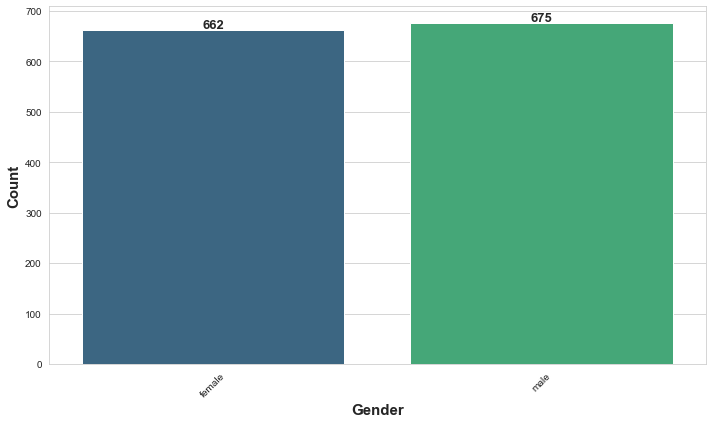

In [11]:
# x , y = list(df['sex'].unique()),list(df['sex'].value_counts())
BarPlot(df=df, x='sex', x_label='Gender', y_label='Count')

**Smoke**

Smoke variable is categorical data, represent either the person is a smoker or not.

- People who smoke are more higher than those who are not
- smokers are more likely to develop health concerns in the future
- and therefore represent a greater risk for insurance companies.

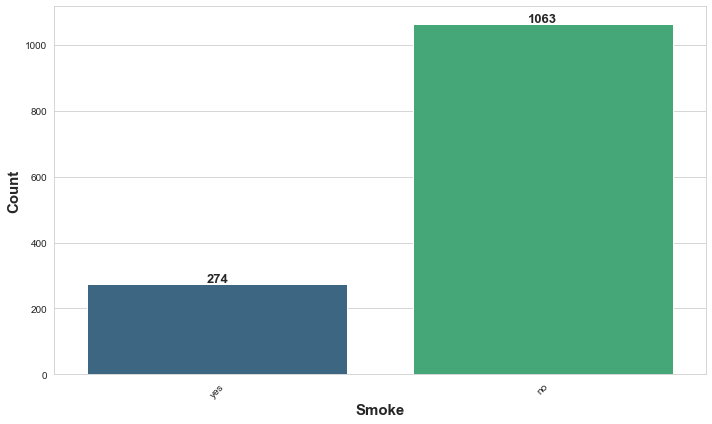

In [12]:
# x , y = list(df['smoker'].unique()),list(df['smoker'].value_counts())
BarPlot(df=df, x='smoker', x_label='Smoke', y_label='Count')

**Age**

Age is discrete data,The minimum age in the dataset is 20 and the maximum age is 60  , we can visualize the distribution of age using a histogram.

- Adults ages 20 to 30  had the highest uninsured rates of any age group

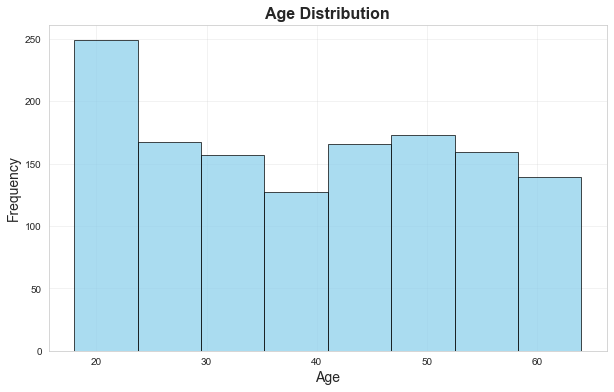

In [13]:
plt.figure(figsize=(10,6))
plt.hist(x=df['age'],bins=8, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

**Region**

Region is a categorical data, represent where person lives.

- People are living in southwest more than other region
- southeast is the second places where people live

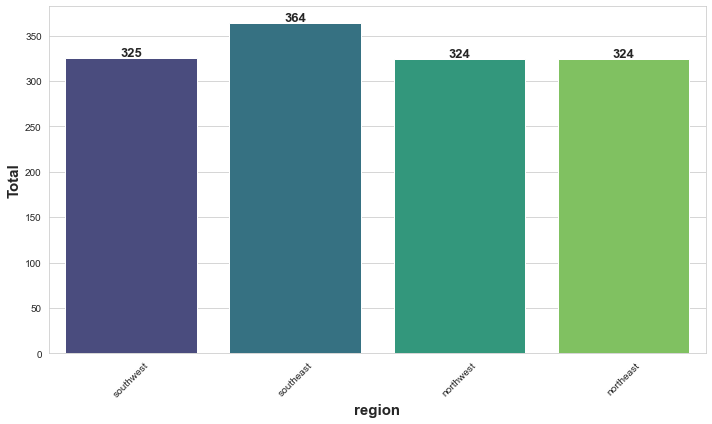

In [14]:
# x , y = list(df['region'].unique()),list(df['region'].value_counts())
BarPlot(df=df, x='region', x_label='region', y_label='Total')

**Children**
Children is a numerical data, represent total number of children each person has.

- People that do not have children is very high than other
- while those people with only child is the second.

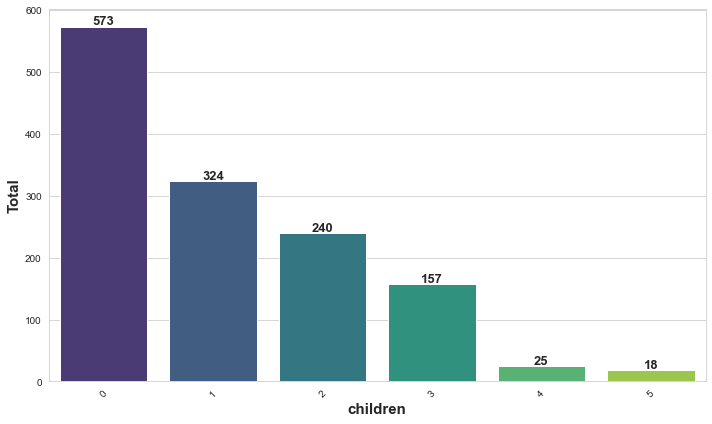

In [15]:
# x , y = list(df['children'].unique()),list(df['children'].value_counts())
BarPlot(df=df, x='children', x_label='children', y_label='Total')

**BMI**

BMI is the is the continous data, is a measure of body fat based on height and weight that applies to adult men and women.

- Total number of people who are extremely fat are more than other.


![bmi-adult-fb-600x315.jpg](attachment:bmi-adult-fb-600x315.jpg)

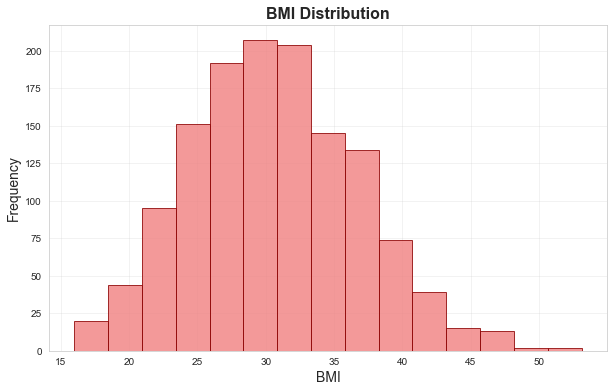

In [16]:
plt.figure(figsize=(10,6))
plt.hist(x=df['bmi'],bins=15, color='lightcoral', alpha=0.8, edgecolor='darkred')
plt.title('BMI Distribution', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

**Bivariate Analysis**

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

**Gender with Expenses**
- Female expenses is more than male expenses
- women are considered a higher risk than men because they tend to visit the doctor more frequently, live longer, and have babies.

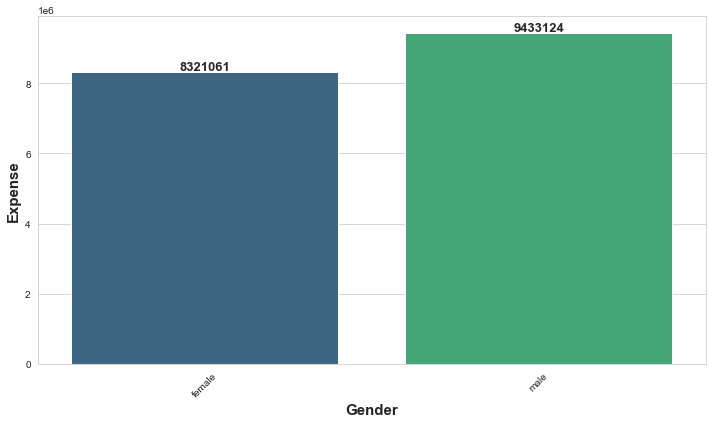

In [17]:
# This seems to be intended as a barplot showing the sum of expenses by sex, not a countplot.
# We need to group by sex and sum expenses first, then use BarPlotFromValues
sex_expenses = df.groupby('sex')['expenses'].sum().reset_index()
BarPlotFromValues(x=sex_expenses['sex'], y=sex_expenses['expenses'], x_label='Gender', y_label='Expense')

**Smoker with Expenses**
Smoker is categorical while expenses is continous data, expenses represent amount both non-smoker and smoker do pay

- smokers are charged a higher premium
- Because they have a higher mortality risk compared to non-smokers.
- non-smokers can enjoy a premium discount.

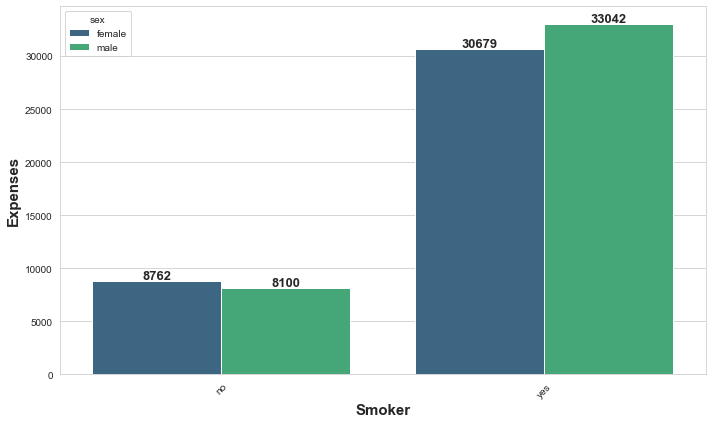

In [18]:
# This seems to be intended as a barplot showing the expenses by smoker status, potentially with hue for sex.
# We need to group by smoker and sex and calculate the average expenses, then use BarPlotFromValues
smoker_expenses = df.groupby(['smoker', 'sex'])['expenses'].mean().reset_index()
BarPlotFromValues(x=smoker_expenses['smoker'], y=smoker_expenses['expenses'], x_label='Smoker', y_label='Expenses', hue=smoker_expenses['sex'])

**Region with Smoker**

Region is the categorical data represent places where people live, while smoker tell either those people are smoker or not

- smoker are high in southest than other region

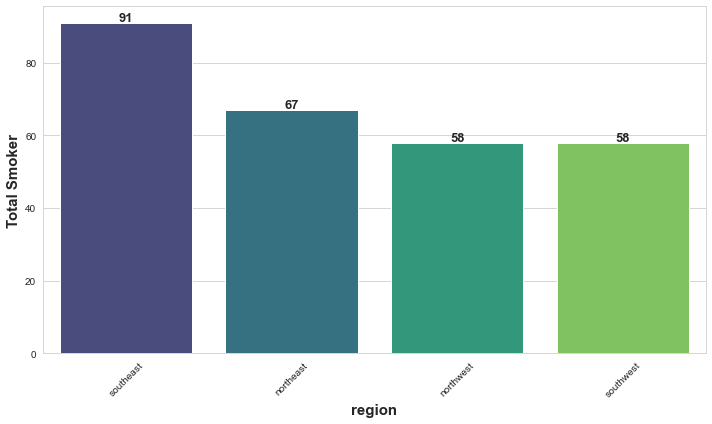

In [19]:
reg_smoker = df[df['smoker'] == 'yes'].groupby(['region']).agg({'smoker':'count'}).sort_values('smoker',ascending=False)
# This should use BarPlotFromValues as it's using pre-calculated counts
BarPlotFromValues(x=reg_smoker.index, y=reg_smoker['smoker'], x_label='region', y_label='Total Smoker')

**Region with Smoker**

Region is the categorical data represent places where people live, while smoker tell either those people are smoker or not

- Non -smoker are litle bit less in southest than other region
- View people are smoking in every region

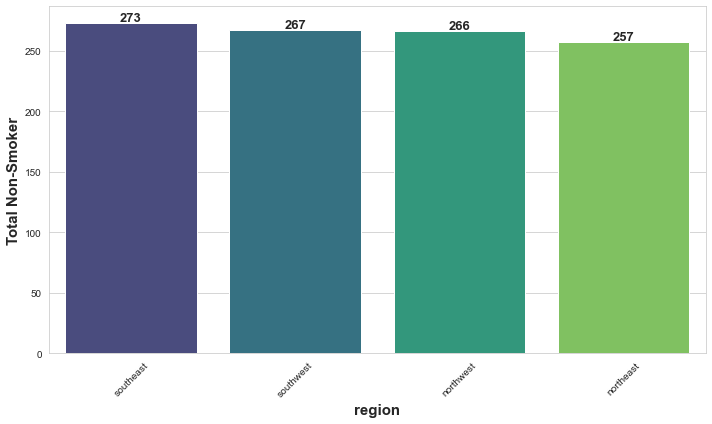

In [20]:
reg_smoker = df[df['smoker'] == 'no'].groupby(['region']).agg({'smoker':'count'}).sort_values('smoker',ascending=False)
# This should use BarPlotFromValues as it's using pre-calculated counts
BarPlotFromValues(x=reg_smoker.index, y=reg_smoker['smoker'], x_label='region', y_label='Total Non-Smoker')

**Age with Expenses**

- Young people are charging high than other age
- Young people don’t see private health insurance as good value for money.
- As younger, healthier people drop their insurance, the insurance risk pool gets worse.
- premiums go up, more young people drop out, and the cycle continues.

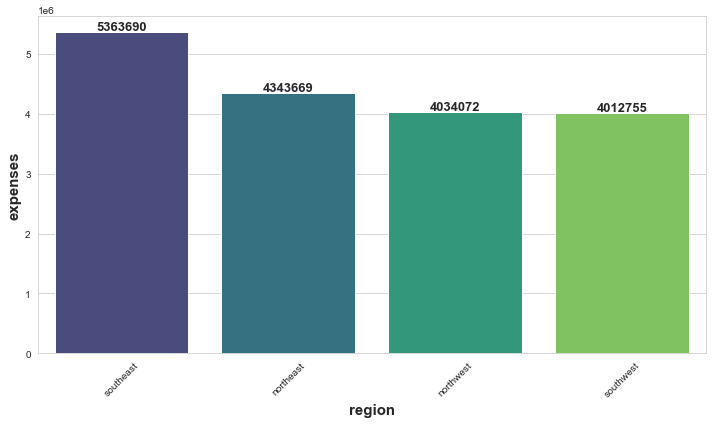

In [21]:
age_expenses = df.groupby(['region']).agg({'expenses':'sum'}).sort_values('expenses',ascending=False).head(4)
# This should use BarPlotFromValues as it's using pre-calculated sums
BarPlotFromValues(x=age_expenses.index, y=age_expenses['expenses'], x_label='region', y_label='expenses')

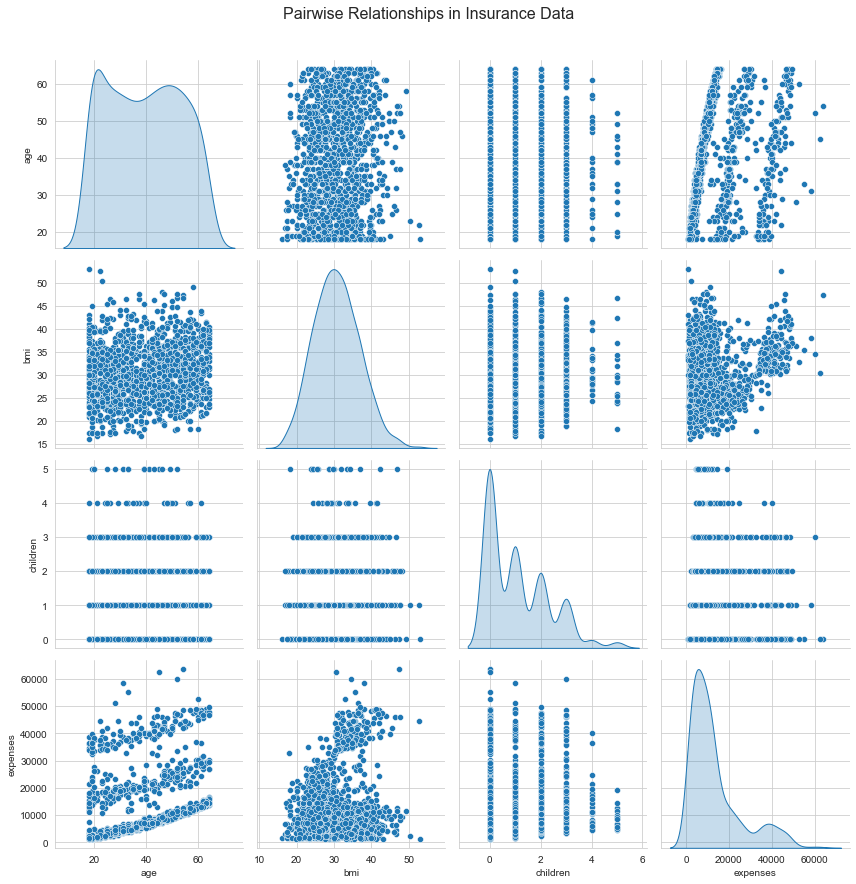

In [22]:
sns.pairplot(df, height=3, diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Relationships in Insurance Data', y=1.02, fontsize=16)
plt.tight_layout()

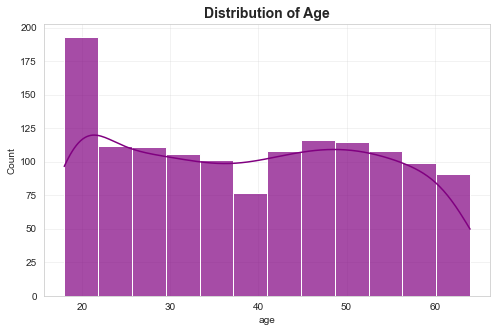

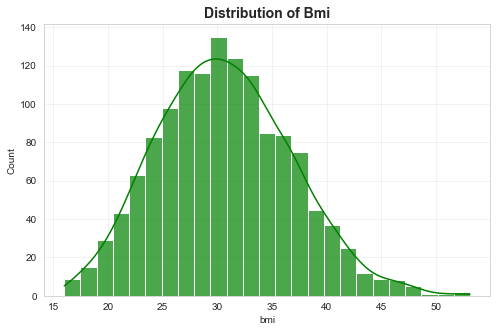

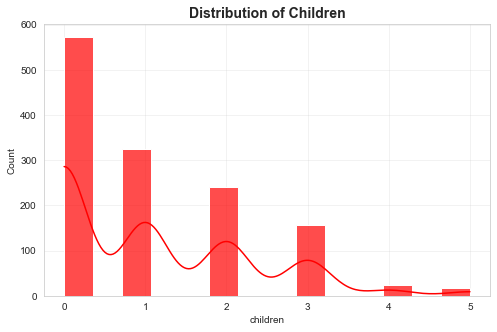

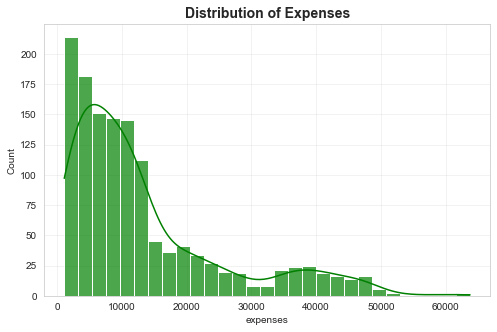

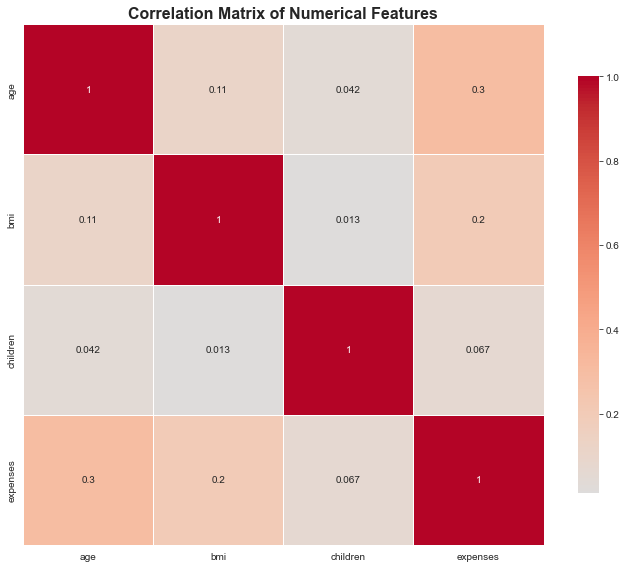

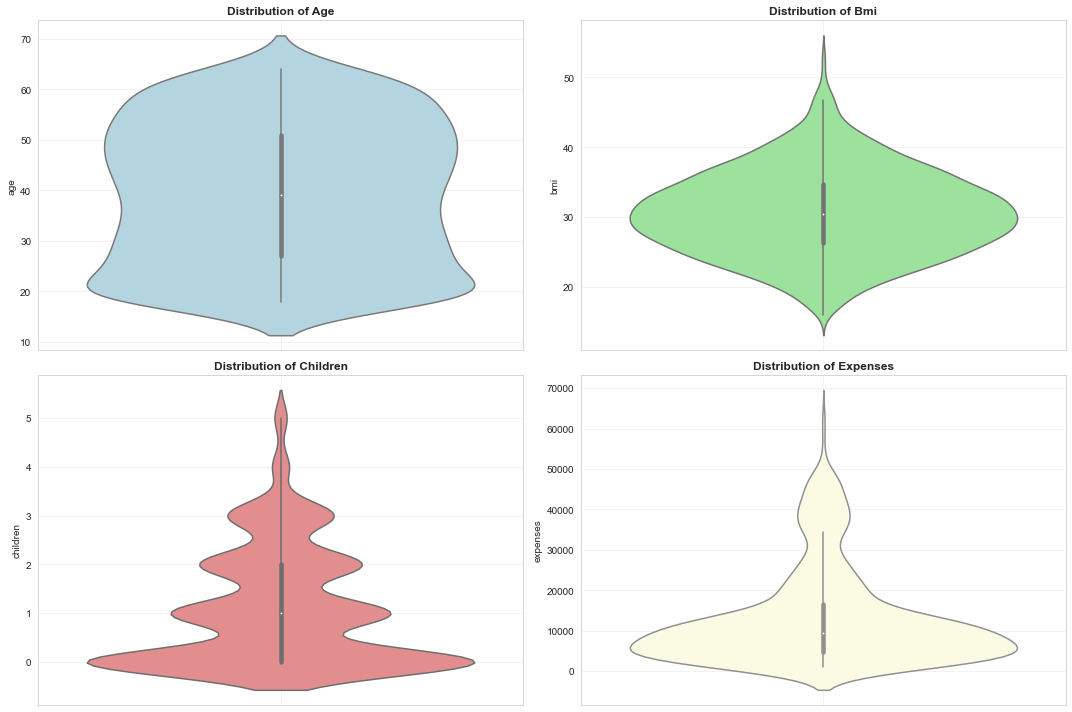

In [23]:
from scipy import stats
colors = ['purple', 'orange', 'green', 'red']
for i, col in enumerate(df.columns):
    if df[col].dtypes != 'object':
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], kde=True, color=colors[i % len(colors)], alpha=0.7)
        plt.title(f'Distribution of {col.title()}', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Violin plots for better distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
numerical_cols = df.select_dtypes(include=[np.number]).columns
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

for i, col in enumerate(numerical_cols):
    row, col_idx = i // 2, i % 2
    sns.violinplot(y=df[col], ax=axes[row, col_idx], color=colors[i])
    axes[row, col_idx].set_title(f'Distribution of {col.title()}', fontweight='bold')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<center><h2>Feature Engineering</h2></center><hr>
<b>Feature engineering</b> is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.

This step often include some of the following steps:
- Feature Encoding
- Feature Scaling
- Feature Selection

In [24]:
data = df.copy()
X = data.drop('expenses',axis=1)
y = data['expenses']

The **Sklearn train_test_split** function splits a dataset into training data and test data.

Split the dataset into two pieces: a training set and a testing set. This consists of random sampling without replacement about 80% (you can vary this) of the rows and putting them into your training set and putting the remaining 20% to your test set.



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature encoding** is the technique used to encode categorical features into numerical values which are usually simpler for an algorithm to understand.
Before encoding categorical data, it is very important to know different types of categorical exist.

**Types Of Categorical Data**
<ol>
    <li>Norminal</li>
    <li> Ordinal</li>
</ol>

Norminal Data: is defined as data that is used for naming or labelling variables, without any quantitative value.
Example: Gender, Country, Region, Color

Ordinal Data: is a kind of categorical data with a set order or scale to it

Example: Education Background, Satisfication Level.

Since we have understood difference between them, it is time we moved to different types of encoding techniques exist in machine learning.

Categorical Encoding Tyoes
<ol><li>Norminal Data</li></ol>

> - One Hot Encoding
> - Dummy Encoding
> - Mean Encoding

<ol><li>Ordinal Data</li></ol>

> - Label Encoding
> - Target Guided Label Encoding


In [26]:
categorical_features = X_train.select_dtypes(include='object').columns

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown ='ignore' ,sparse_output=False,drop='if_binary'))
])

preprocessor = ColumnTransformer(transformers=[
    ('category',categorical_pipeline,categorical_features),
],remainder='passthrough')

#### Make prediction using LinearRegression algorithm

In [27]:
lr = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
score = r2_score(y_test,lr_pred)

#### Make Prediction using Decision Tree Regressor algorithm

In [28]:
dec_tree = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('decision_tree',DecisionTreeRegressor(random_state=43))
])

dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)

#### Make prediction using Polynomial Regression algorithm

In [29]:
poly_pipeline = Pipeline(steps=[
            ('preprocessor',preprocessor),
            ('poly',PolynomialFeatures(degree=3, include_bias=False)),
            ('regressor',LinearRegression(fit_intercept=False))
])

poly_pipeline.fit(X_train,y_train)
poly_pred = poly_pipeline.predict(X_test)

#### Make prediction using Random Forest Regressor algorithm

In [30]:
rf = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=600, min_samples_split=5,
                                    max_features = 'sqrt',random_state=13,
                                      max_depth = 560,min_samples_leaf=8))
])

rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

#### Make prediction using GradientBoosting Regressor algorithm

In [31]:
gd = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('gradient',GradientBoostingRegressor(n_estimators=41,
      max_depth=3,min_samples_split=4, random_state=42))
])

gd.fit(X_train, y_train)
gd_pred = gd.predict(X_test)

In [32]:
# Define function taking different metrics to estimate total error in prediction
def ModelEvaluate(pred):
    mse = mean_squared_error(y_test,pred)
    mae = mean_absolute_error(y_test,pred)
    score = r2_score(y_test,pred) * 100
    all_ = [mse,mae,score]
    return all_

In [33]:
# Calling ModelEvaluation function to calculate model performance
r1 = ModelEvaluate(lr_pred)
r2 = ModelEvaluate(dec_tree_pred)
r3 = ModelEvaluate(poly_pred)
r4 = ModelEvaluate(rf_pred)
r5 = ModelEvaluate(gd_pred)

In [34]:
mse,mae = [r1[0],r2[0],r3[0],r4[0],r5[0]], [r1[1], r2[1],r3[1],r4[1],r5[1]]
accuracy = [r1[2],r2[2],r3[2],r4[2],r5[2]]
df2 = pd.DataFrame({'MSE':mse,'MAE':mae,'ACCURACY':accuracy})
df2

,MSE,MAE,ACCURACY
0,3.548147e+07,4177.267596,80.690993
1,3.640904e+07,2755.125933,80.186209
2,2.372329e+07,3049.415966,87.089791
3,2.813073e+07,3539.722405,84.691266
4,1.828716e+07,2510.969930,90.048133


Plot accuracy of each model using barplot

From below graph we can see that both (Random Forest & Gradient Descent) loss error reduced and accuracy is better compared to other algorithm.<br>
Therefore we will save both of it for further testing

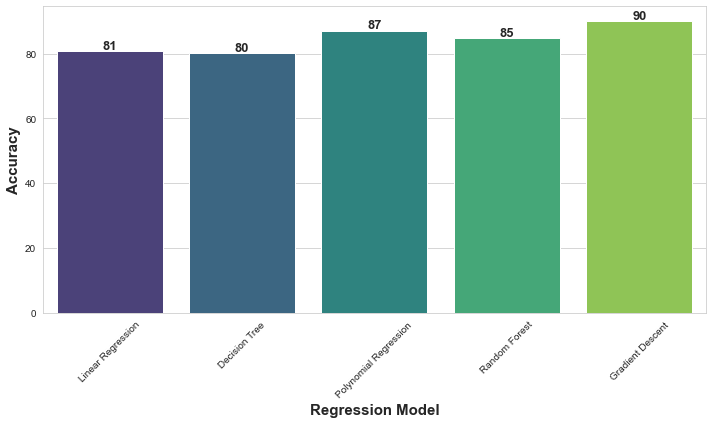

In [35]:
x = ['Linear Regression','Decision Tree','Polynomial Regression',"Random Forest",'Gradient Descent']
BarPlotFromValues(x=x ,y=accuracy, x_label = 'Regression Model',y_label= 'Accuracy')

In [37]:
with open ('model.pkl', 'wb') as file:
    pickle.dump(rf,file)